<a href="https://colab.research.google.com/github/harissmunir/Analag-Clock-IOS-/blob/main/SHA_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
diabetes_data = pd.read_csv("./diabetic_data.csv")
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
IDs_data = pd.read_csv("./IDs_mapping.csv")
IDs_data.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


# New Section

In [ ]:
def custom_nan_mean(column):
  new_column = column
  sum = 0
  counter = 0
  for i in range(len(new_column)):
    try:
      sum += float(new_column[i])
      counter += 1
    except ValueError:
      pass
  col_mean = sum/counter
  for i in range(len(new_column)):
    try:
      float(new_column[i])
    except ValueError:
      new_column[i] = col_mean
  return new_column

In [ ]:
# ? Data filtering helper:

# def filter_qs(data_column):
#   # new_data = list()

#   # for val in data_column:

#   #   try:
#   #     new_data.append(float(val))

#   #   except ValueError:
#   #     pass
#   # return new_data

In [ ]:
def levels_encoding(column):
  new_column = []
  for i in range(len(column)):
    if column[i] == "Up":
      new_column.append(3)
    elif column[i] == "Down":
      new_column.append(1)
    elif column[i] == "Steady":
      new_column.append(2)
    else:
      new_column.append(0)
  return new_column

In [ ]:
def binary_encoding(column):
  new_column = []
  for i in range(len(column)):
    if column[i] == "Ch" or column[i] == "Yes":
      new_column.append(1)
    if column[i] == "No":
      new_column.append(0)
  return new_column

In [ ]:
# Data filtering / reformatting stage:

diabetes_y = diabetes_data['readmitted']


diabetes_X = np.empty(len(diabetes_data.age)*40, dtype = 'float').reshape(len(diabetes_data.age), 40)

diabetes_X[:, 0] = custom_nan_mean([float(i[-3:-1]) for i in diabetes_data.age])
diabetes_X[:, 1] = custom_nan_mean(diabetes_data.admission_type_id)
diabetes_X[:, 2] = custom_nan_mean(diabetes_data.discharge_disposition_id)
diabetes_X[:, 3] = custom_nan_mean(diabetes_data.admission_source_id)
diabetes_X[:, 4] = custom_nan_mean(diabetes_data.time_in_hospital)

diabetes_X[:, 5] = custom_nan_mean(diabetes_data.num_lab_procedures)
diabetes_X[:, 6] = custom_nan_mean(diabetes_data.num_medications)
diabetes_X[:, 7] = custom_nan_mean(diabetes_data.number_outpatient)
diabetes_X[:, 8] = custom_nan_mean(diabetes_data.number_emergency)
diabetes_X[:, 9] = custom_nan_mean(diabetes_data.number_inpatient)

diabetes_X[:, 10] = custom_nan_mean(diabetes_data.diag_1)
diabetes_X[:, 11] = custom_nan_mean(diabetes_data.diag_2)
diabetes_X[:, 12] = custom_nan_mean(diabetes_data.diag_3)
diabetes_X[:, 13] = custom_nan_mean(diabetes_data.number_diagnoses)
diabetes_X[:, 14] = custom_nan_mean(diabetes_data.num_procedures)

diabetes_X[:, 15] = levels_encoding(diabetes_data.metformin)
diabetes_X[:, 16] = levels_encoding(diabetes_data.repaglinide)
diabetes_X[:, 17] = levels_encoding(diabetes_data.nateglinide)
diabetes_X[:, 18] = levels_encoding(diabetes_data.chlorpropamide)
diabetes_X[:, 19] = levels_encoding(diabetes_data.glimepiride)
diabetes_X[:, 20] = levels_encoding(diabetes_data.acetohexamide)
diabetes_X[:, 21] = levels_encoding(diabetes_data.glipizide)
diabetes_X[:, 22] = levels_encoding(diabetes_data.glyburide)
diabetes_X[:, 23] = levels_encoding(diabetes_data.tolbutamide)
diabetes_X[:, 24] = levels_encoding(diabetes_data.pioglitazone)
diabetes_X[:, 25] = levels_encoding(diabetes_data.rosiglitazone)
diabetes_X[:, 26] = levels_encoding(diabetes_data.acarbose)
diabetes_X[:, 27] = levels_encoding(diabetes_data.miglitol)
diabetes_X[:, 28] = levels_encoding(diabetes_data.troglitazone)
diabetes_X[:, 29] = levels_encoding(diabetes_data.tolazamide)
diabetes_X[:, 30] = levels_encoding(diabetes_data.examide)
diabetes_X[:, 31] = levels_encoding(diabetes_data.citoglipton)
diabetes_X[:, 32] = levels_encoding(diabetes_data.insulin)
diabetes_X[:, 33] = levels_encoding(diabetes_data['glyburide-metformin'])
diabetes_X[:, 34] = levels_encoding(diabetes_data['glipizide-metformin'])
diabetes_X[:, 35] = levels_encoding(diabetes_data['glimepiride-pioglitazone'])
diabetes_X[:, 36] = levels_encoding(diabetes_data['metformin-rosiglitazone'])
diabetes_X[:, 37] = levels_encoding(diabetes_data['metformin-pioglitazone'])
diabetes_X[:, 38] = levels_encoding(diabetes_data['change'])
diabetes_X[:, 39] = levels_encoding(diabetes_data['diabetesMed'])

<ipython-input-4-1a08929af4c8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_column[i] = col_mean


In [ ]:
# print(diabetes_data.diag_1[0])
print(diabetes_data.diag_2[0])

438.67488318230863


In [ ]:
print(np.unique(diabetes_y))

['<30' '>30' 'NO']


In [ ]:
diab_X_tr, diab_X_te, diab_y_tr, diab_y_te = train_test_split(diabetes_X, diabetes_y,
                                                                  test_size=0.2, random_state=seed, shuffle=True)
diab_X_val = diab_X_tr[48886:] # 20% of the data is training data
diab_y_val = diab_y_tr[48886:]
diab_X_tr = diab_X_tr[0:48886] # 60% of the data is training data
diab_y_tr = diab_y_tr[0:48886]
# print(len(diab_X_tr), len(diab_y_tr))

In [ ]:
scaler = StandardScaler()
diab_X_tr = scaler.fit_transform(diab_X_tr)
diab_X_val = scaler.fit_transform(diab_X_val)
diab_X_te = scaler.transform(diab_X_te)

In [ ]:
k_vals = [1,5,10,50, 100, 250, 500, 750, 1000, 1250, 1500, 2000]
training_error = []
validation_error = []

for i in range(len(k_vals)):
  knn = KNeighborsClassifier(n_neighbors=k_vals[i])
  knn.fit(diab_X_tr, diab_y_tr)

  y_pred_tr = knn.predict(diab_X_tr)
  tr_accuracy = accuracy_score(diab_y_tr, y_pred_tr)
  training_error.append(1 - tr_accuracy)
  y_pred_val = knn.predict(diab_X_val)
  val_accuracy = accuracy_score(diab_y_val, y_pred_val)
  validation_error.append(1 - val_accuracy)


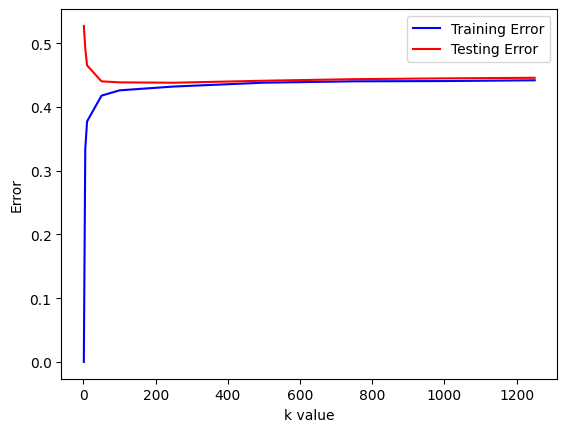

In [ ]:
plt.plot(k_vals[0:10], training_error[0:10], 'blue', label='Training Error')
plt.plot(k_vals[0:10], testing_error[0:10], 'red', label='Testing Error')
plt.xlabel('k value')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
for i in range(0, len(k_vals)):
  print(k_vals[i], " ",training_error[i], testing_error[i] )

1   0.0 0.5271199764174118
5   0.33377654134107926 0.4919917460941339
10   0.377326842040666 0.46521568242114575
50   0.4177474123470932 0.4401591824702761
100   0.4260524485537782 0.4385870099243392
250   0.4320255287812461 0.4379974452196128
500   0.43810088777973244 0.4411417903114867
750   0.44020783046270917 0.4435983099145131
1000   0.4406169455467823 0.4448265697160263
1250   0.4418442907990018 0.44576004716517637
1500   0.442846622754981 0.44669352461432643
2000   0.44481037515853206 0.44792178441583963


In [ ]:
# BEST KNN
knn = KNeighborsClassifier(n_neighbors=250)
knn.fit(diab_X_tr, diab_y_tr)

KNeighborsClassifier(n_neighbors=250)

In [ ]:
pred_y_tr = knn.predict(diab_X_tr)
pred_y_te = knn.predict(diab_X_te)
pred_y_val = knn.predict(diab_X_val)

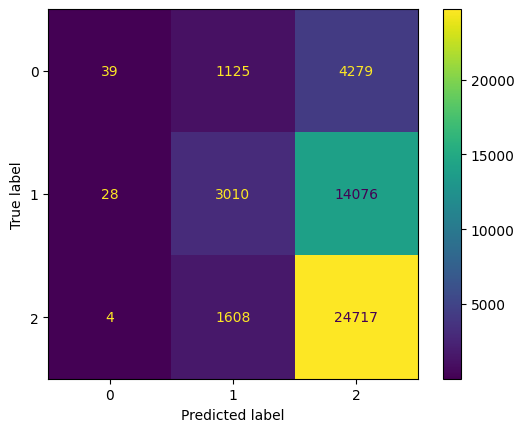

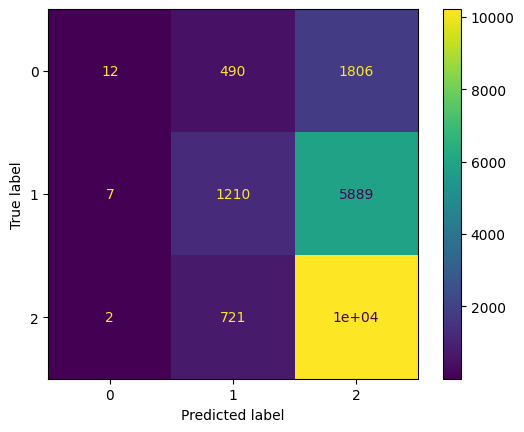

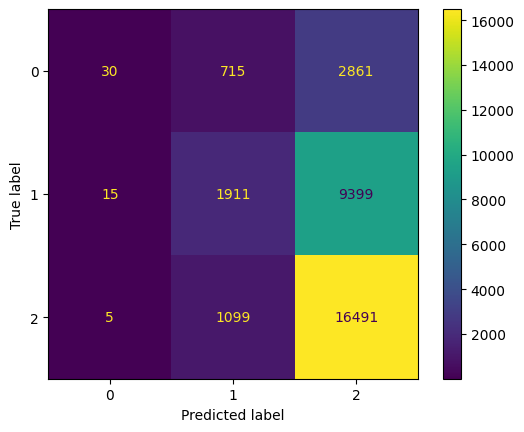

In [ ]:
sklearn_cm = confusion_matrix(diab_y_tr, pred_y_tr)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

sklearn_cm = confusion_matrix(diab_y_te, pred_y_te)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

sklearn_cm = confusion_matrix(diab_y_val, pred_y_val)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

Text(0, 0.5, 'Count')

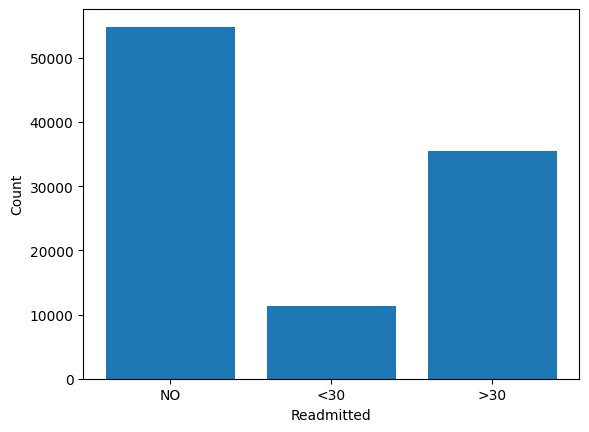

In [ ]:
count = [0, 0, 0]
labels = ["NO", "<30", ">30"]

for label in diabetes_y:
  if label == "NO":
    count[0] +=1
  if label == "<30":
    count[1] += 1
  if label == ">30":
    count[2] +=1

plt.bar(labels, count)
plt.xlabel("Readmitted")
plt.ylabel("Count")

In [ ]:

print(count)
freq = [0, 0, 0]

sum = 0

for c in count:
  sum += c

for i in range(0, 3):
  freq[i] = (count[i]) / len(diabetes_y)

print(freq)


[54864, 11357, 35545]
[0.5391191557101586, 0.11159915885462728, 0.3492816854352141]


NEURAL NETWORK

In [ ]:
print(len(diab_X_tr[0]))
print(len(diab_X_tr))

40
48886


In [ ]:
batch_sizes = [10, 20, 40, 80, 160, 320, 640, 1000, 2000, 4000, 8000, 16000]

tr_rate = []
te_rate = []


for batchSize in batch_sizes:
  mlp = MLPClassifier(hidden_layer_sizes=(40, 35, 20, 10, 5, 3),
                      activation='relu', solver='sgd',
                      batch_size= 10000, learning_rate_init=0.001, max_iter=200)
  mlp.fit(diab_X_tr, diab_y_tr)

  tr_rate.append(1 - mlp.score(diab_X_tr, diab_y_tr))
  te_rate.append(1 - mlp.score(diab_X_te, diab_y_te))


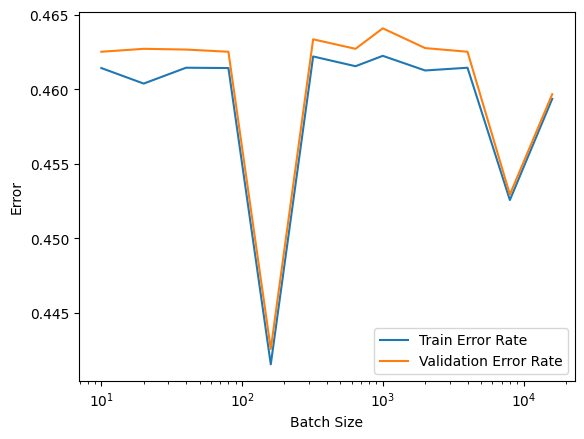

In [ ]:
plt.semilogx(batch_sizes, tr_rate, label='Train Error Rate')
plt.semilogx(batch_sizes, te_rate, label='Validation Error Rate')
plt.xlabel('Batch Size')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
iters = [10, 20, 50, 100, 200]

tr_rate = []
te_rate = []


for iter in iters:
  mlp = MLPClassifier(hidden_layer_sizes=(40, 35, 20, 10, 5, 3),
                      activation='relu', solver='sgd',
                      batch_size= 20, learning_rate_init=0.01, max_iter=iter)
  mlp.fit(diab_X_tr, diab_y_tr)

  tr_rate.append(1 - mlp.score(diab_X_tr, diab_y_tr))
  te_rate.append(1 - mlp.score(diab_X_te, diab_y_te))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


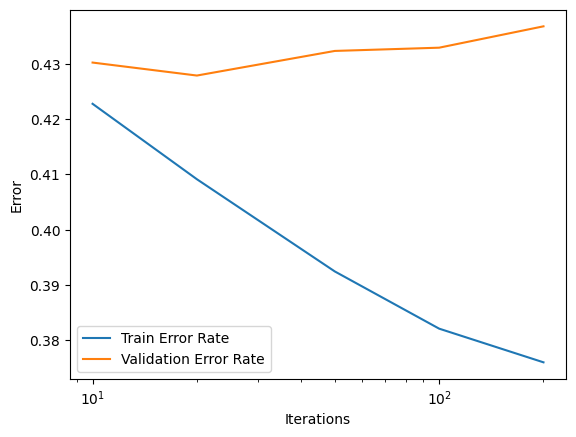

In [ ]:
plt.semilogx(iters, tr_rate, label='Train Error Rate')
plt.semilogx(iters, te_rate, label='Validation Error Rate')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
lr = [1, 0.1, 0.01, 0.001, 0.0001]

tr_rate = []
te_rate = []


for rate in lr:
  mlp = MLPClassifier(hidden_layer_sizes=(40, 35, 20, 10, 5, 3),
                      activation='relu', solver='sgd',
                      batch_size= 20, learning_rate_init=rate, max_iter=20)
  mlp.fit(diab_X_tr, diab_y_tr)

  tr_rate.append(1 - mlp.score(diab_X_tr, diab_y_tr))
  te_rate.append(1 - mlp.score(diab_X_te, diab_y_te))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


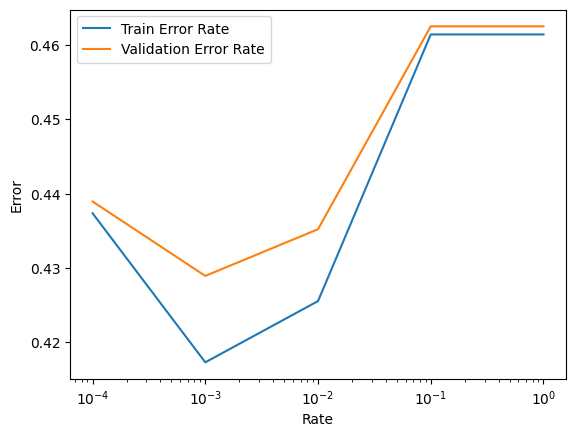

In [ ]:
plt.semilogx(lr, tr_rate, label='Train Error Rate')
plt.semilogx(lr, te_rate, label='Validation Error Rate')
plt.xlabel('Rate')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
solver = ['lbfgs', 'sgd', 'adam']

tr_rate = []
te_rate = []


for solve in solver:
  mlp = MLPClassifier(hidden_layer_sizes=(40, 35, 20, 10, 5, 3),
                      activation='relu', solver=solve,
                      batch_size= 20, learning_rate_init=0.01, max_iter=20)
  mlp.fit(diab_X_tr, diab_y_tr)

  tr_rate.append(1 - mlp.score(diab_X_tr, diab_y_tr))
  te_rate.append(1 - mlp.score(diab_X_te, diab_y_te))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


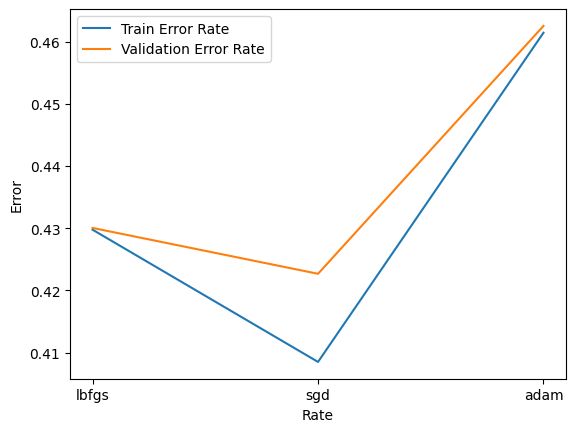

In [ ]:
plt.plot(solver, tr_rate, label='Train Error Rate')
plt.plot(solver, te_rate, label='Validation Error Rate')
plt.xlabel('Rate')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 35, 20, 10, 5, 3),
                    activation='relu', solver='sgd',
                    batch_size= 20000, learning_rate_init=0.001, )
mlp.fit(diab_X_tr, diab_y_tr)

print("Validation")
print(1 - mlp.score(diab_X_te, diab_y_te))
print("test")
print(1 - mlp.score(diab_X_tr, diab_y_tr))

Validation
0.46241525007369555
test
0.4611954342756618


In [ ]:
# lr = [1, 0.1, 0.01, 0.001, 0.0001]

# tr_rate = []
# te_rate = []


# for rate in lr:
#   mlp = MLPClassifier(hidden_layer_sizes=(40, 35, 20, 10, 5, 3),
#                       activation='relu', solver='adam',
#                       batch_size= 20, learning_rate_init=rate, max_iter=200)
#   mlp.fit(diab_X_tr, diab_y_tr)

#   tr_rate.append(1 - mlp.score(diab_X_tr, diab_y_tr))
#   te_rate.append(1 - mlp.score(diab_X_te, diab_y_te))

In [ ]:
# plt.semilogx(lr, tr_rate, label='Train Error Rate')
# plt.semilogx(lr, te_rate, label='Validation Error Rate')
# plt.xlabel('Rate')
# plt.ylabel('Error')
# plt.legend()
# plt.show()

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(40, 35, 20, 10, 5, 3),
#                     activation='relu', solver='sgd',
#                     batch_size= 20, learning_rate_init=0.01, max_iter=20)
# mlp.fit(diab_X_tr, diab_y_tr)

# print(1 - mlp.score(diab_X_tr, diab_y_tr))
# print(1 - mlp.score(diab_X_te, diab_y_te))



In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(40, 35, 20, 10),
#                     activation='relu', solver='sgd',
#                     batch_size= 20, learning_rate_init=0.01, max_iter=20)
# mlp.fit(diab_X_tr, diab_y_tr)

# print(1 - mlp.score(diab_X_tr, diab_y_tr))
# print(1 - mlp.score(diab_X_te, diab_y_te))

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 40, 30, 20, 10),
#                     activation='relu', solver='sgd',
#                     batch_size= 20, learning_rate_init=0.01, max_iter=20)
# mlp.fit(diab_X_tr, diab_y_tr)

# print(1 - mlp.score(diab_X_tr, diab_y_tr))
# print(1 - mlp.score(diab_X_te, diab_y_te))

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 40, 30, 20, 10),
#                     activation='relu', solver='sgd',
#                     batch_size= 20, learning_rate_init=0.01, learning_rate = 'adaptive', max_iter=200)
# mlp.fit(diab_X_tr, diab_y_tr)

# print(1 - mlp.score(diab_X_tr, diab_y_tr))
# print(1 - mlp.score(diab_X_te, diab_y_te))

OMG! Insane Testing accuracy, its overfitting!

In [ ]:
# iters = [10, 20, 50, 100, 200]

# tr_rate = []
# te_rate = []


# for iter in iters:
#   mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 40, 30, 20, 10),
#                     activation='relu', solver='sgd',
#                     batch_size= 20, learning_rate_init=0.01, learning_rate = 'adaptive', max_iter=iter)
#   mlp.fit(diab_X_tr, diab_y_tr)

#   tr_rate.append(1 - mlp.score(diab_X_tr, diab_y_tr))
#   te_rate.append(1 - mlp.score(diab_X_te, diab_y_te))

In [ ]:
# plt.semilogx(iters, tr_rate, label='Train Error Rate')
# plt.semilogx(iters, te_rate, label='Validation Error Rate')
# plt.xlabel('Iterations')
# plt.ylabel('Error')
# plt.legend()
# plt.show()

In [ ]:
# lr = [1, 0.1, 0.01, 0.001, 0.0001]

# tr_rate = []
# te_rate = []


# for rate in lr:
#   mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 40, 30, 20, 10),
#                     activation='relu', solver='sgd',
#                     batch_size= 20, learning_rate_init= rate, learning_rate = 'adaptive', max_iter=20)
#   mlp.fit(diab_X_tr, diab_y_tr)
#   mlp.fit(diab_X_tr, diab_y_tr)

#   tr_rate.append(1 - mlp.score(diab_X_tr, diab_y_tr))
#   te_rate.append(1 - mlp.score(diab_X_te, diab_y_te))

In [ ]:
# plt.semilogx(lr, tr_rate, label='Train Error Rate')
# plt.semilogx(lr, te_rate, label='Validation Error Rate')
# plt.xlabel('Rate')
# plt.ylabel('Error')
# plt.legend()
# plt.show()

In [ ]:
# penalty = [0.0001, 0.001, 0.01, 0.1, 1]

# tr_rate = []
# te_rate = []


# for rate in penalty:
#   mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 40, 30, 20, 10),
#                       activation='relu', solver='sgd', alpha = rate,
#                       batch_size= 20, learning_rate_init=0.01, learning_rate = 'adaptive', max_iter=200)
#   mlp.fit(diab_X_tr, diab_y_tr)

#   tr_rate.append(1 - mlp.score(diab_X_tr, diab_y_tr))
#   te_rate.append(1 - mlp.score(diab_X_te, diab_y_te))

In [ ]:
# plt.semilogx(penalty, tr_rate, label='Train Error Rate')
# plt.semilogx(penalty, te_rate, label='Validation Error Rate')
# plt.xlabel('Rate')
# plt.ylabel('Error')
# plt.legend()
# plt.show()

FINAL MODEL

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 40, 30, 20, 10),
                  activation='relu', solver='sgd', alpha = 0.01,
                  batch_size= 20, learning_rate_init= 0.01, learning_rate = 'adaptive', max_iter=20)
mlp.fit(diab_X_tr, diab_y_tr)
mlp.fit(diab_X_tr, diab_y_tr)

print(1 - mlp.score(diab_X_tr, diab_y_tr))
print(1 - mlp.score(diab_X_te, diab_y_te))
print(1 - mlp.score(diab_X_val, diab_y_val))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4098719469786851
0.41898398349218824
0.41751214413084914


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
pred_y_tr = mlp.predict(diab_X_tr)
pred_y_te = mlp.predict(diab_X_te)
pred_y_val = mlp.predict(diab_X_val)


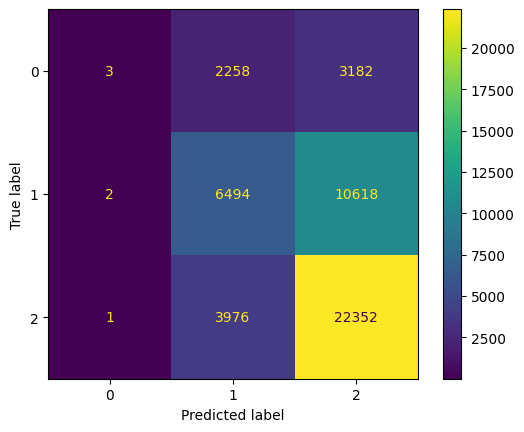

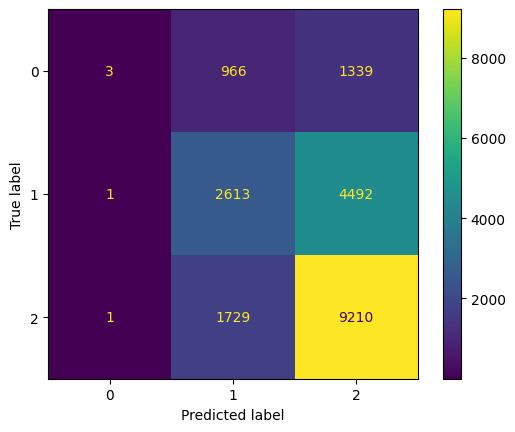

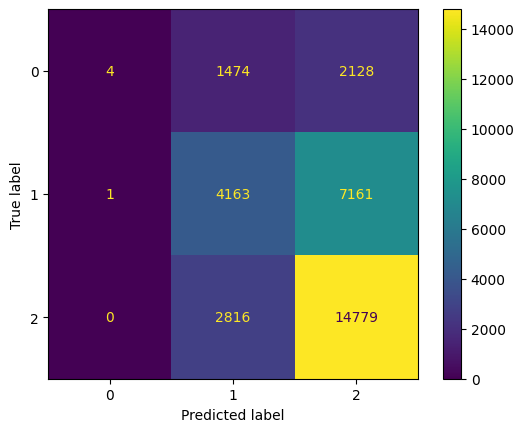

In [ ]:
sklearn_cm = confusion_matrix(diab_y_tr, pred_y_tr)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

sklearn_cm = confusion_matrix(diab_y_te, pred_y_te)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

sklearn_cm = confusion_matrix(diab_y_val, pred_y_val)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

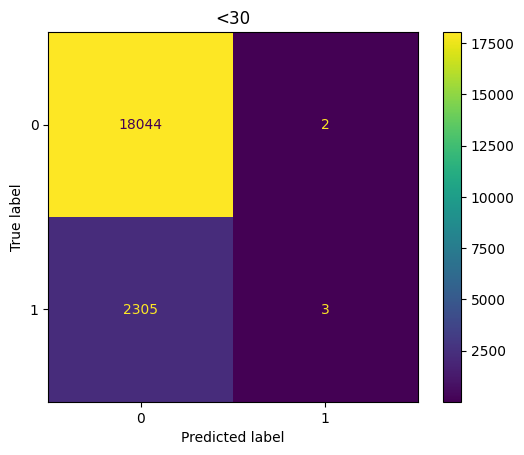

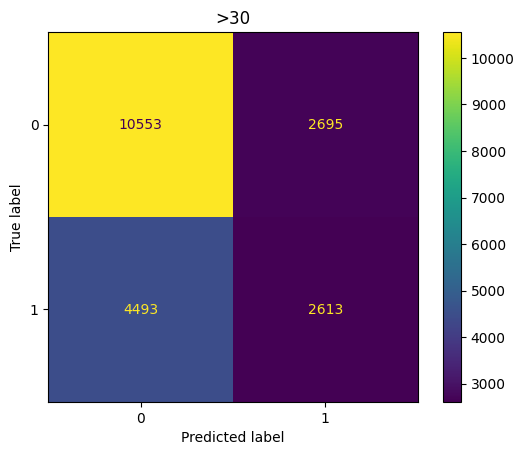

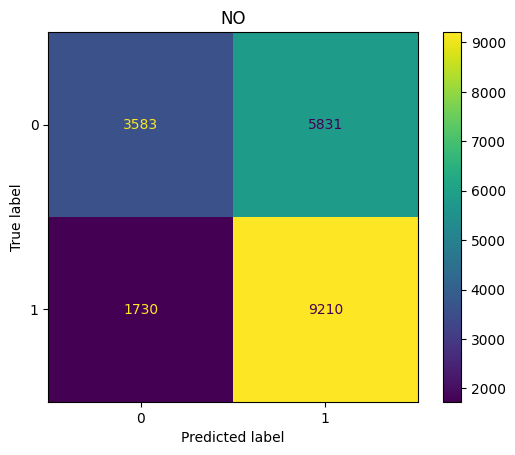

In [ ]:
for label in np.unique(diab_y_te):
    sklearn_cm = confusion_matrix(diab_y_te == label, pred_y_te== label)
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
    sklearn_disp.plot(include_values=True, values_format='.0f');
    plt.title(f"{label}")
    plt.show()

In [ ]:
# count = [0, 0, 0]

# for label in diab_y_tr:
#   if label == ">30":
#     count[1] +=1
#   if label == "NO":
#     count[2] +=1
#   if label == "<30":
#     count[0] += 1

# print(count)

# for i in range(0, len(count)):
#   count[i] = count[i] / len(diab_y_tr)

# print(count)



LOGISTIC CLASSIFIER

Training
0.4310027410710633
Validation
0.42814978786201807


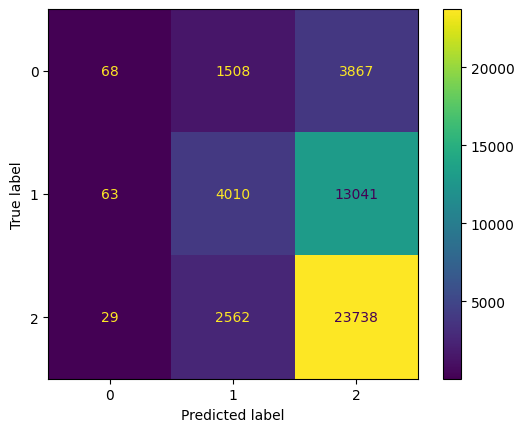

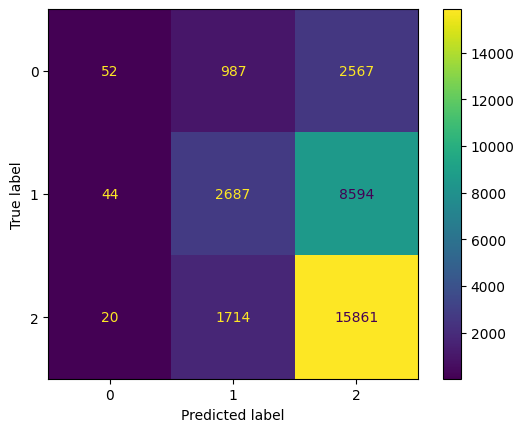

In [ ]:
# multinomial will use cross entropy loss function
logReg = LogisticRegression(penalty='l2', max_iter = 100, solver = 'lbfgs', multi_class = 'multinomial')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

pred_y_tr = logReg.predict(diab_X_tr)
pred_y_val = logReg.predict(diab_X_val)

sklearn_cm = confusion_matrix(diab_y_tr, pred_y_tr)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

sklearn_cm = confusion_matrix(diab_y_val, pred_y_val)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

In [ ]:
# multinomial will use cross entropy loss function
logReg = LogisticRegression(penalty='l2', max_iter = 200, solver = 'lbfgs', multi_class = 'multinomial')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

Training
0.4310027410710633
Validation
0.42814978786201807


In [ ]:
# multinomial will use cross entropy loss function
logReg = LogisticRegression(penalty='l2', max_iter = 500, solver = 'lbfgs', multi_class = 'multinomial')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

Training
0.4310027410710633
Validation
0.42814978786201807


In [ ]:
# multi_class is using a one-vs-rest scheme
logReg = LogisticRegression(penalty='l2', max_iter = 100, solver = 'newton-cg', multi_class = 'ovr')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

Training
0.4328437589493924
Validation
0.4297792535202607


In [ ]:
# multi_class is using a one-vs-rest scheme, now with newton-cg solver and l2 penalty
# Observation: changing penalty regularization parameter also is not changing accuracy
logReg = LogisticRegression(penalty='l2', max_iter = 100, solver = 'newton-cg', multi_class = 'ovr')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

Training
0.4328437589493924
Validation
0.4297792535202607


In [ ]:
# multi_class is using a one-vs-rest scheme
# Observation: changing the "solver" is not affecting the accuracies. Note, I had to increase max_iter
# so that the model would converge -- otherwise it was giving an error.
logReg = LogisticRegression(penalty='l2', max_iter = 1000, solver = 'sag', multi_class = 'ovr')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

Training
0.4328437589493924
Validation
0.4297792535202607


In [ ]:
# multi_class is using a one-vs-rest scheme
# Observation: changing the "solver" is not affecting the accuracies
logReg = LogisticRegression(penalty='l2', max_iter = 100, solver = 'lbfgs', multi_class = 'ovr')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

Training
0.4328233031951888
Validation
0.4297792535202607


In [ ]:
# multi_class is using a one-vs-rest scheme. Now trying to change penalty to elasticnet
# Observation: changing the "solver" is not affecting the accuracies
logReg = LogisticRegression(penalty='l2', max_iter = 500, solver = 'saga', multi_class = 'ovr')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training
0.4328437589493924
Validation
0.4297792535202607


In [ ]:
# multinomial will use cross entropy loss function
logReg = LogisticRegression(penalty='l1', max_iter = 100, solver = 'saga', multi_class = 'ovr')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training
0.43288467045779977
Validation
0.4297177642501383


In [ ]:
# multinomial will use cross entropy loss function
logReg = LogisticRegression(penalty='l1', max_iter = 200, solver = 'saga', multi_class = 'ovr')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training
0.43288467045779977
Validation
0.4297177642501383


In [ ]:
# multi_class is using a one-vs-rest scheme. Now trying to change penalty to elasticnet
# Observation: changing the "solver" is not affecting the accuracies
logReg = LogisticRegression(penalty='l2', max_iter = 100, solver = 'liblinear', multi_class = 'ovr')
logReg.fit(diab_X_tr, diab_y_tr)
print("Training")
print(1 - logReg.score(diab_X_tr, diab_y_tr))
print("Validation")
print(1 - logReg.score(diab_X_val, diab_y_val))

Training
0.4328028474409852
Validation
0.4297792535202607


In [ ]:
pred_y_tr = logReg.predict(diab_X_tr)
pred_y_te = logReg.predict(diab_X_te)
pred_y_val = logReg.predict(diab_X_val)

In [ ]:
for label in np.unique(diab_y_te):
    sklearn_cm = confusion_matrix(diab_y_te == label, pred_y_te== label)
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
    sklearn_disp.plot(include_values=True, values_format='.0f');
    plt.title(f"{label}")
    plt.show()

Decision Tree

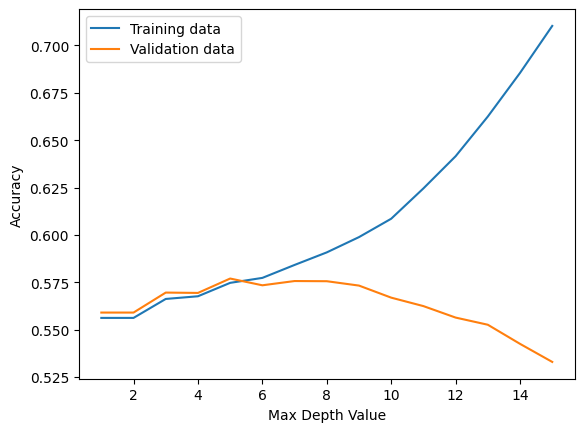

In [ ]:
tr_accs = []
val_accs = []
for depth in range(1, 16):
  clf = DecisionTreeClassifier(max_depth=depth, random_state=seed)
  clf.fit(diab_X_tr, diab_y_tr)
  tr_pred = clf.predict(diab_X_tr)
  val_pred = clf.predict(diab_X_val)
  tr_acc = accuracy_score(diab_y_tr, tr_pred)
  val_acc = accuracy_score(diab_y_val, val_pred)
  tr_accs.append(tr_acc)
  val_accs.append(val_acc)
plt.plot(range(1,16), tr_accs, label='Training data')
plt.plot(range(1,16), val_accs, label='Validation data')
plt.xlabel('Max Depth Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

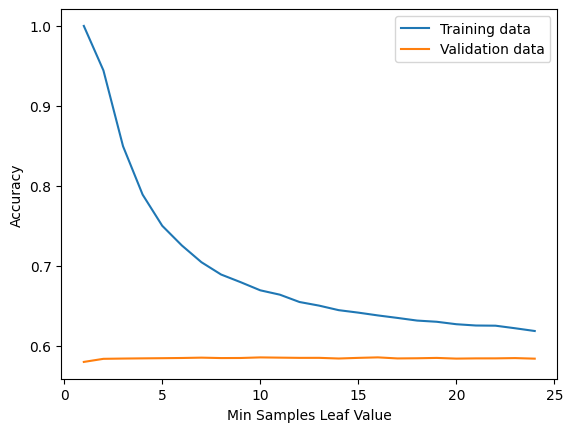

In [ ]:
# tr_accs = []
# val_accs = []
# for val in range(1, 25):
#   clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=val, random_state=seed)
#   clf.fit(diab_X_tr, diab_y_tr)
#   tr_pred = clf.predict(diab_X_tr)
#   val_pred = clf.predict(diab_X_val)
#   tr_acc = accuracy_score(diab_y_tr, tr_pred)
#   val_acc = accuracy_score(diab_y_val, val_pred)
#   tr_accs.append(tr_acc)
#   val_accs.append(val_acc)
# plt.plot(range(1,25), tr_accs, label='Training data')
# plt.plot(range(1,25), val_accs, label='Validation data')
# plt.xlabel('Max Depth Value')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

tr_accs = []
val_accs = []
for val in range(1, 25):
  clf = RandomForestClassifier(min_samples_leaf = val)
  clf.fit(diab_X_tr, diab_y_tr)
  tr_pred = clf.predict(diab_X_tr)
  val_pred = clf.predict(diab_X_val)
  tr_acc = accuracy_score(diab_y_tr, tr_pred)
  val_acc = accuracy_score(diab_y_val, val_pred)
  tr_accs.append(tr_acc)
  val_accs.append(val_acc)
plt.plot(range(1,25), tr_accs, label='Training data')
plt.plot(range(1,25), val_accs, label='Validation data')
plt.xlabel('Min Samples Leaf Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()